In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

print(x_train.shape)

# Normalize pixel values
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
(50000, 32, 32, 3)


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
782/782 - 68s - 87ms/step - accuracy: 0.4202 - loss: 1.5870 - val_accuracy: 0.5040 - val_loss: 1.3986
Epoch 2/10
782/782 - 61s - 78ms/step - accuracy: 0.5628 - loss: 1.2315 - val_accuracy: 0.6040 - val_loss: 1.1143
Epoch 3/10
782/782 - 82s - 105ms/step - accuracy: 0.6213 - loss: 1.0753 - val_accuracy: 0.6311 - val_loss: 1.0391
Epoch 4/10
782/782 - 83s - 106ms/step - accuracy: 0.6557 - loss: 0.9817 - val_accuracy: 0.6423 - val_loss: 1.0064
Epoch 5/10
782/782 - 78s - 100ms/step - accuracy: 0.6840 - loss: 0.9025 - val_accuracy: 0.6705 - val_loss: 0.9427
Epoch 6/10
782/782 - 83s - 106ms/step - accuracy: 0.7041 - loss: 0.8441 - val_accuracy: 0.6762 - val_loss: 0.9294
Epoch 7/10
782/782 - 84s - 108ms/step - accuracy: 0.7213 - loss: 0.7898 - val_accuracy: 0.6805 - val_loss: 0.9151
Epoch 8/10
782/782 - 80s - 102ms/step - accuracy: 0.7403 - loss: 0.7395 - val_accuracy: 0.7053 - val_loss: 0.8514
Epoch 9/10
782/782 - 82s - 105ms/step - accuracy: 0.7540 - loss: 0.7033 - val_accuracy: 0.

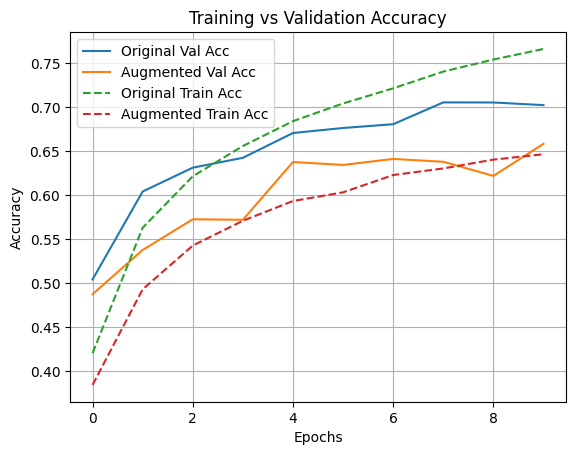

In [ ]:
# Simple CNN model architecture
def build_model():
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Train original model
original_model = build_model()
history_original = original_model.fit(x_train, y_train, epochs=10,
                                      validation_data=(x_test, y_test),
                                      batch_size=64, verbose=2)

# Data augmentation layer
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1)
])

# Apply augmentation to the dataset
augmented_train_ds = tf.data.Dataset.from_tensor_slices((x_train, y_train))
augmented_train_ds = augmented_train_ds.shuffle(10000).batch(64).map(
    lambda x, y: (data_augmentation(x, training=True), y)
).prefetch(buffer_size=tf.data.AUTOTUNE)

# Use same validation set
val_ds = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(64)

# Train model on augmented data
augmented_model = build_model()
history_augmented = augmented_model.fit(augmented_train_ds,
                                        validation_data=val_ds,
                                        epochs=10, verbose=2)

# Plot training and validation accuracy
plt.plot(history_original.history['val_accuracy'], label='Original Val Acc')
plt.plot(history_augmented.history['val_accuracy'], label='Augmented Val Acc')
# plt.plot(history_original.history['accuracy'], label='Original Train Acc', linestyle='--')
# plt.plot(history_augmented.history['accuracy'], label='Augmented Train Acc', linestyle='--')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/5
938/938 - 52s - 56ms/step - accuracy: 0.8051 - loss: 0.5372 - val_accuracy: 0.8538 - val_loss: 0.4066
Epoch 2/5
938/938 - 52s - 55ms/step - accuracy: 0.8761 - loss: 0.3416 - val_accuracy: 0.8751 - val_loss: 0.3441
Epoch 3/5
938/938 - 79s - 84ms/step - accuracy: 0.8929 - loss: 0.2931 - val_accuracy: 0.8851 - val_loss: 0.3044
Epoch 4/5
938/938 - 82s - 88ms/step - accuracy: 0.9029 - loss: 0.2631 - val_accuracy: 0.8971 - val_loss: 0.2794
Epoch 5/5
938/938 - 82s - 87ms/step - accuracy: 0.9116 - loss: 0.2393 - val_accuracy: 0.9007 - val_loss: 0.2689
Epoch 1/5
938/938 - 56s - 60ms/step - accuracy: 0.7106 - loss: 0.7728 - val_accuracy: 0.7947 - val_loss: 0.5712
Epoch 2/5
938/938 - 53s - 57ms/step - accuracy: 0.7996 - loss: 0.5394 - val_accuracy: 0.8156 - val_loss: 0.5177
Epoch 3/5
938/938 - 53s - 57

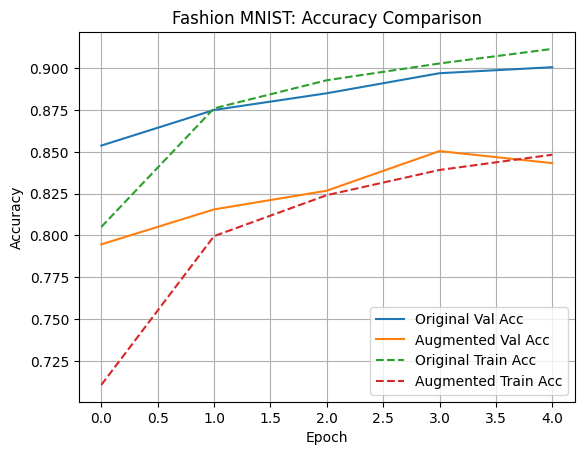

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# Load Fashion MNIST
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# Expand dims for CNN input shape (28, 28, 1)
x_train = x_train[..., tf.newaxis].astype("float32") / 255.0
x_test = x_test[..., tf.newaxis].astype("float32") / 255.0

# CNN model
def build_model():
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Original model
original_model = build_model()
history_orig = original_model.fit(x_train, y_train, epochs=5,
                                   validation_data=(x_test, y_test),
                                   batch_size=64, verbose=2)

# Data augmentation
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1)
])

# Augmented dataset pipeline
augmented_ds = tf.data.Dataset.from_tensor_slices((x_train, y_train))
augmented_ds = augmented_ds.shuffle(10000).batch(64).map(
    lambda x, y: (data_augmentation(x, training=True), y)
).prefetch(tf.data.AUTOTUNE)

val_ds = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(64)

# Augmented model
augmented_model = build_model()
history_aug = augmented_model.fit(augmented_ds, validation_data=val_ds,
                                  epochs=5, verbose=2)

# Plotting accuracy
plt.plot(history_orig.history['val_accuracy'], label='Original Val Acc')
plt.plot(history_aug.history['val_accuracy'], label='Augmented Val Acc')
plt.plot(history_orig.history['accuracy'], label='Original Train Acc', linestyle='--')
plt.plot(history_aug.history['accuracy'], label='Augmented Train Acc', linestyle='--')
plt.title('Fashion MNIST: Accuracy Comparison')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()
